In [1]:
# 기본 라이브러리 import 
import pandas as pd
import numpy as np
# 시각화 라이브러리 import 
import seaborn as sns
import matplotlib.pyplot as plt

# 표준화 라이브러리 import 
from sklearn.preprocessing import StandardScaler

# k 값 참고: scree plot을 통한 k 값 확인을 위한 라이브러리 import 
from yellowbrick.cluster import KElbowVisualizer
# k 값 참고: distance map 라이브러리 import 
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans
# k 값 참고: 실루엣 계수 확인을 위한 라이브러리 import 
from sklearn.metrics import silhouette_score


# 데이터셋 주성분 분석중 하나인 pca 를 수행하기 위한 라이브러리 import 
from sklearn.decomposition import PCA

# k-means 알고리즘 활용을 위한 라이브러리 import 
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# 데이터셋 로드
base_df = pd.read_csv('merge_df.csv')

In [3]:
# 결측치 확인
base_df.isnull().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [4]:
# 클러스터링 할 컬럼 지정
feature_names=['customer_zip_code_prefix','price','shipping_charges','payment_sequential','payment_value']

# 지정된 컬럼으로 새로운 dataframe 생성 
base_df = pd.DataFrame(base_df, columns=feature_names)

In [5]:
base_df

,customer_zip_code_prefix,price,shipping_charges,payment_sequential,payment_value
0,14409,124.99,21.88,1,146.87
1,68030,112.99,24.90,1,275.79
2,68030,112.99,24.90,1,275.79
3,92480,124.99,15.62,1,140.61
4,25931,106.99,30.59,1,137.58
...,...,...,...,...,...
124330,4313,19.99,10.96,1,30.95
124331,68660,250.00,54.11,1,304.11
124332,5734,84.90,7.46,1,92.36
124333,37610,167.99,31.93,1,167.79


In [6]:
# 표준화
# 표준화 방식: standard scaler (평균0, 분산1)
scale_df = StandardScaler().fit_transform(base_df)

In [7]:
scale_df

array([[-0.68749787,  0.03603339,  0.12720383, -0.13187908, -0.09465826],
       [ 1.10853767, -0.03063849,  0.32126056, -0.13187908,  0.39578803],
       [ 1.10853767, -0.03063849,  0.32126056, -0.13187908,  0.39578803],
       ...,
       [-0.97806701, -0.18670624, -0.79938495, -0.13187908, -0.30202894],
       [ 0.08961969,  0.27494094,  0.77298865, -0.13187908, -0.01507297],
       [ 0.08961969,  0.27494094,  0.77298865,  1.24661486, -0.53116003]])

In [8]:
# 주성분 개수를 판단하기 위한 pca임의 시행 
pca = PCA(n_components=3)
pca.fit(scale_df)
# 설정한 주성분의 갯수로 전체 데이터 분산을 얼만큼 설명 가능한지 
pca.explained_variance_ratio_.sum()

0.8233997183348624

In [9]:
# pca 시행
pca_df = pca.fit_transform(scale_df)
pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3'])  

# Show the first 5 firms
pca_df.head()

,PC1,PC2,PC3
0,-0.080155,0.522990,-0.212266
1,0.560893,-1.006799,0.080830
2,0.560893,-1.006799,0.080830
3,0.136486,-1.658824,0.167309
4,0.170358,0.003202,-0.036802


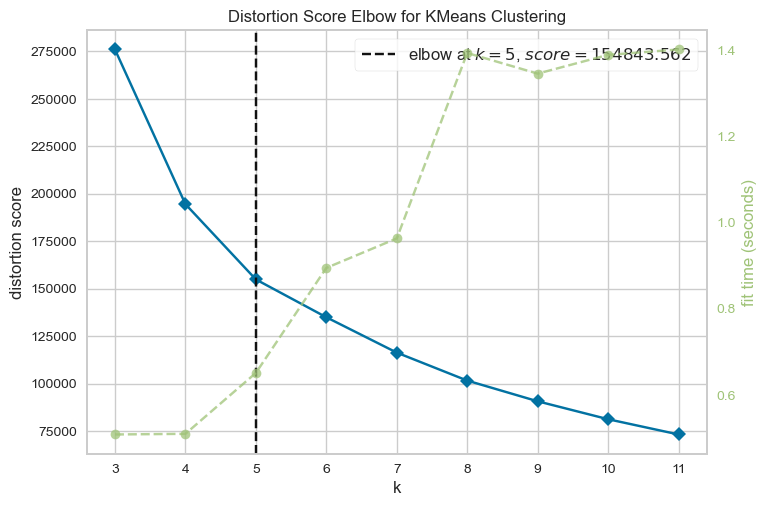

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# 초기 k 값 참고를 위한 scree plot 을 그리고, 군집이 나뉘는 시간까지 고려한 k 값 확인 
model = KMeans()

# k 값의 범위를 조정해 줄 수 있습니다. 
visualizer = KElbowVisualizer(model, k=(3,12))

# 데이터 적용 
visualizer.fit(pca_df) 
visualizer.show()   

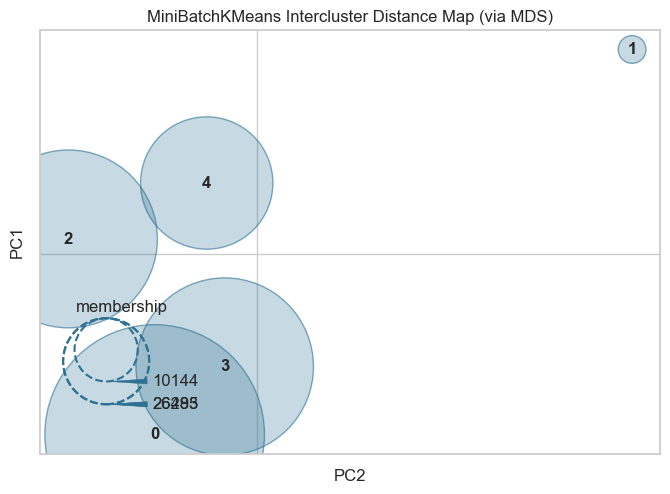

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=5, random_state=42))

In [11]:
# 초기 k 값 참고를 위한 distance map 시각화
#그룹의 갯수를 지정해 줄 수 있습니다. 저는 5로 적어두었습니다. 
intercluster_distance(MiniBatchKMeans(5, random_state=42), pca_df)

In [12]:
#  KMEANS
# 군집개수(n_cluster)는 5,초기 중심 설정방식 랜덤,  
kmeans = KMeans(n_clusters=5, random_state=42, init='random')

# pca df 를 이용한 kmeans 알고리즘 적용
kmeans.fit(pca_df)

# 클러스터 번호 가져오기 
labels = kmeans.labels_

# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)

In [13]:
# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df.groupby(['Cluster'])['PC1'].count().reset_index()

,Cluster,PC1
0,0,766
1,1,33288
2,2,924
3,3,8446
4,4,80911


In [14]:
base_df

,customer_zip_code_prefix,price,shipping_charges,payment_sequential,payment_value
0,14409,124.99,21.88,1,146.87
1,68030,112.99,24.90,1,275.79
2,68030,112.99,24.90,1,275.79
3,92480,124.99,15.62,1,140.61
4,25931,106.99,30.59,1,137.58
...,...,...,...,...,...
124330,4313,19.99,10.96,1,30.95
124331,68660,250.00,54.11,1,304.11
124332,5734,84.90,7.46,1,92.36
124333,37610,167.99,31.93,1,167.79


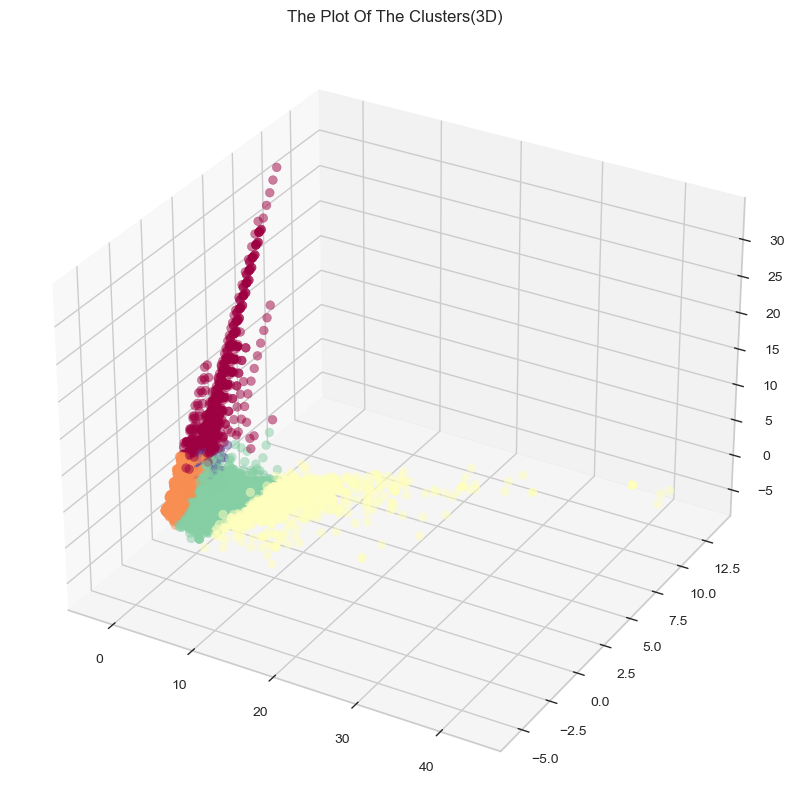

In [15]:
# 3차원으로 시각화 
x =kmeans_df["PC1"]
y =kmeans_df["PC2"]
z =kmeans_df["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=kmeans_df["Cluster"], marker='o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()

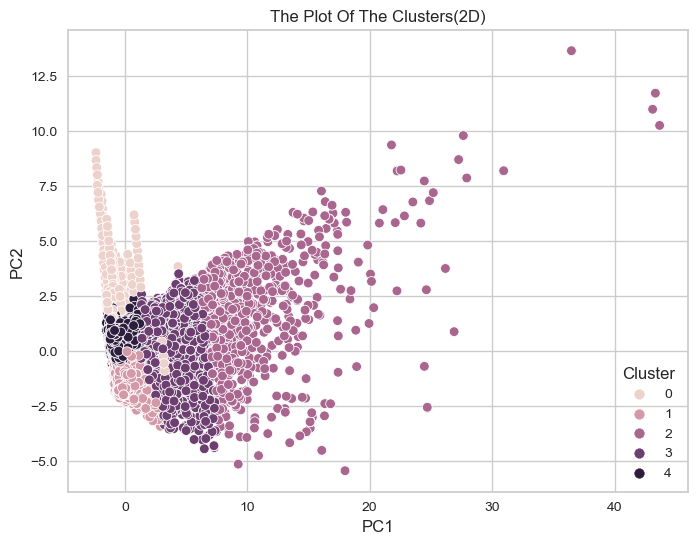

In [16]:
# 2차원으로 시각화

plt.figure(figsize=(8,6))

sns.scatterplot(data = kmeans_df, x = 'PC1', y='PC2', hue='Cluster')
plt.title('The Plot Of The Clusters(2D)')
plt.show()